# Bot Extension Analysis

## Imports

In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "Times New Roman"
from datetime import datetime
import os
from extension_utils import (gen_avg_investments, calculate_and_plot_averages,
                             perform_t_tests, perform_non_parametric_tests,
                             plot_averages_all,
                             test_investment_difference_by_round_corrected,
                             calculate_averages,
                             encode_group_investments, encode_additional_group_investments)

In [52]:
# Folder names

input_folder_ext = r"C:\Users\modak\Dropbox\Work\Multigroup PGG\Data\Extension"
input_folder_main = r"C:\Users\modak\Dropbox\Work\Multigroup PGG\Data\Fall 2023"

today = datetime.now()

output_location = r"C:\Users\modak\Dropbox\Work\Projects\Multigroup PG\Analysis\Output"
path = output_location+"\{}".format(today.strftime('%Y-%m-%d'))

if os.path.exists(path) == False:
    os.mkdir(path)

output_folder = path

# Loading Data

In [6]:
mgpgg_extension_all_df = pd.read_csv(input_folder_ext+"\mgpgg_extension_all_data.csv")

In [63]:
# mgpgg_extension_all_df.head()

In [64]:
# print(mgpgg_extension_all_df.columns)

## Avg Human Investments

In [10]:
# First period investment

avg_investments_FP = gen_avg_investments(mgpgg_extension_all_df[mgpgg_extension_all_df["subsession.round_number"] == 1])
print("First Period")
print(avg_investments_FP)

First Period
{'treatment': 'shared', 'avg_blue_investment': 6.40625, 'std_blue': 2.706363752695628, 'avg_green_investment': 6.421875, 'std_green': 2.4352222772639336, 'avg_blue_true': 6.625, 'std_blue_true': 3.013410884909378, 'avg_green_true': 6.28125, 'std_green_true': 2.2609500572304384, 'avg_blue_false': 6.1875, 'std_blue_false': 2.3886492336235396, 'avg_green_false': 6.5625, 'std_green_false': 2.626631597386108}


In [11]:
# All Periods investment

avg_investments_AP = gen_avg_investments(mgpgg_extension_all_df)
print("All Periods")
print(avg_investments_AP)

All Periods
{'treatment': 'shared', 'avg_blue_investment': 5.31171875, 'std_blue': 4.7319571496977275, 'avg_green_investment': 5.73984375, 'std_green': 4.86602106848065, 'avg_blue_true': 5.44375, 'std_blue_true': 4.569747256069043, 'avg_green_true': 5.3984375, 'std_green_true': 4.621410071028207, 'avg_blue_false': 5.1796875, 'std_blue_false': 4.8888003875454435, 'avg_green_false': 6.08125, 'std_green_false': 5.07961266128948}


## One Session Better vs Work Group Plot

#### Same plot (Mouli)

In [36]:
# Filter the DataFrame based on 'blue_green' being True or False
df_true = mgpgg_extension_all_df[mgpgg_extension_all_df['blue_green']]
df_false = mgpgg_extension_all_df[~mgpgg_extension_all_df['blue_green']]

# Calculate the mean investments for the 'better' and 'worse' groups for both True and False cases
# across all sessions
better_group_averages_true, worse_group_averages_true = calculate_averages(df_true)
better_group_averages_false, worse_group_averages_false = calculate_averages(df_false)

In [40]:
better_group_averages_true_df = better_group_averages_true.to_frame().reset_index()
better_group_averages_false_df = better_group_averages_false.to_frame().reset_index()
worse_group_averages_true_df = worse_group_averages_true.to_frame().reset_index()
worse_group_averages_false_df = worse_group_averages_false.to_frame().reset_index()

better_group_averages_true_df["Order"] = "Blue-Green"
worse_group_averages_true_df["Order"] = "Blue-Green"
better_group_averages_false_df["Order"] = "Green-Blue"
worse_group_averages_false_df["Order"] = "Green-Blue"

better_group_averages_true_df["Group"] = "More Cooperative"
worse_group_averages_true_df["Group"] = "Less Cooperative"
better_group_averages_false_df["Group"] = "More Cooperative"
worse_group_averages_false_df["Group"] = "Less Cooperative"

In [41]:
order_effect_check_df = pd.concat([better_group_averages_false_df, better_group_averages_true_df, worse_group_averages_false_df, worse_group_averages_true_df], ignore_index=True)
# print(order_effect_check_df)

order_effect_check_df.rename(columns={"subsession.round_number":"Period", 
                                                              0:"Average Account Investment"}, inplace=True)
# print(order_effect_check_df)

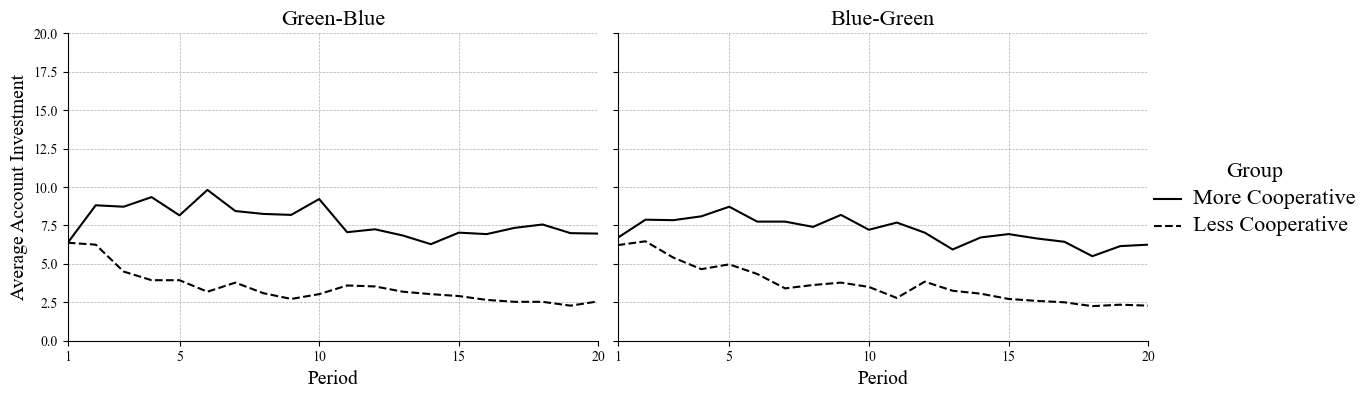

In [51]:
g = sns.FacetGrid(order_effect_check_df, col="Order", margin_titles=True, hue="Group", hue_kws={"color" : ['k', 'k'], "ls" : ["-","--"]}, height=4, aspect=1.5)
g.map(sns.lineplot, "Period", "Average Account Investment")
# g.map(plt.fill_between, "Supergame", "Bootstrap LCI", "Bootstrap HCI", alpha = 0.2)
g.set_titles(col_template = '{col_name}', size=16)
g.set_ylabels(fontsize=14)
g.set_xlabels("Period", fontsize=14)
g.set(xlim=(1, 20), ylim=(0, 20), xticks=[1, 5, 10, 15, 20])
g.add_legend(loc='center right', bbox_to_anchor=(1.01, 0.5))
plt.setp(g._legend.get_title(), fontsize=16)
plt.setp(g._legend.get_texts(), fontsize=16)
for ax in g.axes.flatten():
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(output_folder+'\Order_Effect_byPeriod.png', bbox_inches='tight')

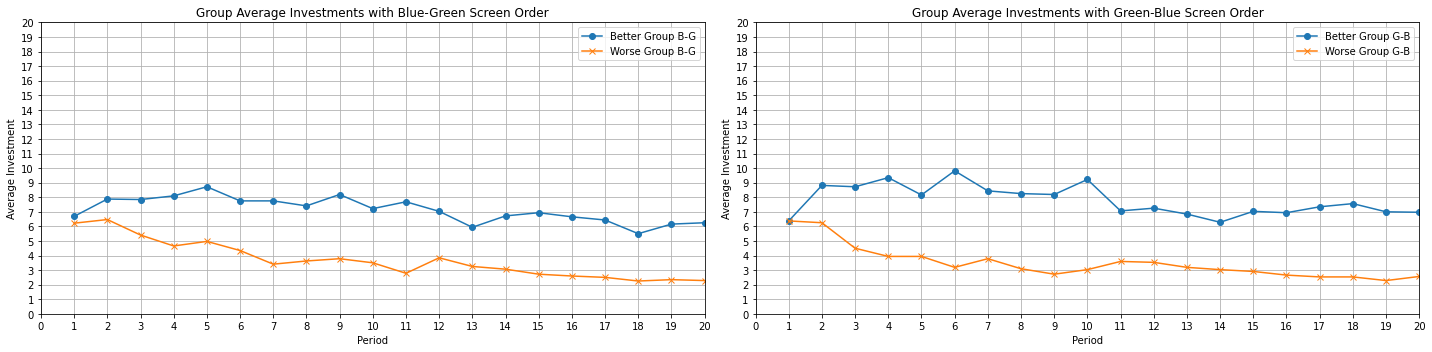

In [11]:
calculate_and_plot_averages(mgpgg_extension_all_df)

## TTest to combine standard and flipped

In [12]:
t_test_results = perform_t_tests(mgpgg_extension_all_df)
print(t_test_results)

{'t_test_better': Ttest_indResult(statistic=-2.133266857286174, pvalue=0.03966480570387229), 't_test_worse': Ttest_indResult(statistic=0.5746632671282222, pvalue=0.5689610442680991)}


In [13]:
wilcoxon_u_results = perform_non_parametric_tests(mgpgg_extension_all_df)
print(wilcoxon_u_results)

{'u_test_better': {'statistic': 130.0, 'p_value': 0.06005055493509417}, 'u_test_worse': {'statistic': 215.5, 'p_value': 0.6848273779537117}}


## Here and below consider data as ONE set 
- (flipped == standard) aka ignore screen 'treatment'

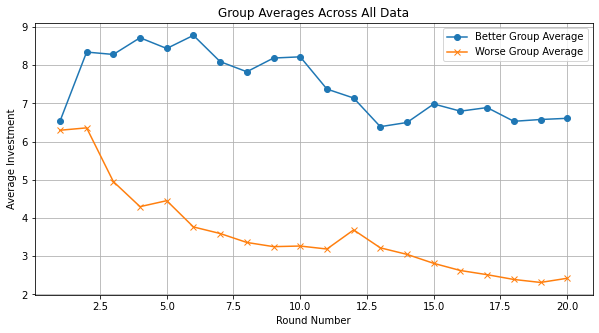

In [14]:
plot_averages_all(mgpgg_extension_all_df)

## Import Shared MAIN experiment data

In [54]:
mgpgg_all_df = pd.read_csv(input_folder_main+"\mgpgg_df_all_sessions.csv", index_col=0)

C:\Users\modak\AppData\Local\Temp\ipykernel_12812\1616589222.py:1: DtypeWarning: Columns (215,216) have mixed types. Specify dtype option on import or set low_memory=False.
  mgpgg_all_df = pd.read_csv(input_folder_main+"\mgpgg_df_all_sessions.csv", index_col=0)


In [55]:
mgpgg_all_df

,pgg_treatment_applied,participant.id_in_session,participant.code,participant.payoff,player.id_in_group,player.payoff,player.investment,player.personal_account,player.indiv_share,player.tot_invest,...,player.clarity,player.suggestions,player.start_time_survey,player.time_spent_survey_one,player.time_spent_survey_two,player.time_spent_survey_three,player.time_spent_survey_four,player.compare_groups,player.reasoning,player.signaling
0,single,1,byr62fae,1190.0,1,34.0,12.0,8.0,26.0,52.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
1,single,1,byr62fae,1190.0,1,37.0,16.0,4.0,33.0,66.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
2,single,1,byr62fae,1190.0,1,38.0,20.0,0.0,38.0,76.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
3,single,1,byr62fae,1190.0,1,40.0,20.0,0.0,40.0,80.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
4,single,1,byr62fae,1190.0,1,40.0,20.0,0.0,40.0,80.0,...,4.0,I didn't have a full understanding of how bein...,1.694195e+09,279.378000,37.599659,18.820385,69.987730,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,shared,16,w9zef9ad,939.0,16,31.0,NaN,5.0,NaN,NaN,...,3.0,NaN,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN
4796,shared,16,w9zef9ad,939.0,16,30.0,NaN,4.0,NaN,NaN,...,3.0,NaN,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN
4797,shared,16,w9zef9ad,939.0,16,33.0,NaN,6.0,NaN,NaN,...,3.0,NaN,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN
4798,shared,16,w9zef9ad,939.0,16,29.0,NaN,4.0,NaN,NaN,...,3.0,NaN,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN


In [87]:
mgpgg_shared_df = mgpgg_all_df[mgpgg_all_df["pgg_treatment_applied"] == "shared"]
mgpgg_shared_df['bots'] = False

C:\Users\modak\AppData\Local\Temp\ipykernel_12812\2172713503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgpgg_shared_df['bots'] = False


In [90]:
# for col in mgpgg_shared_df.columns:
#     print(col)

### Reconstruction Min's and Max's

In [57]:
# construct min and max group investment for each player in each period 

mgpgg_shared_df['player.max_invest'] = np.where(mgpgg_shared_df['player.blue_group_investment'] > mgpgg_shared_df['player.green_group_investment'], 
                                        mgpgg_shared_df['player.blue_group_investment'], 
                                        mgpgg_shared_df['player.green_group_investment'])

mgpgg_shared_df['player.min_invest'] = np.where(mgpgg_shared_df['player.blue_group_investment'] < mgpgg_shared_df['player.green_group_investment'], 
                                        mgpgg_shared_df['player.blue_group_investment'], 
                                        mgpgg_shared_df['player.green_group_investment'])

C:\Users\modak\AppData\Local\Temp\ipykernel_12812\1909665118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgpgg_shared_df['player.max_invest'] = np.where(mgpgg_shared_df['player.blue_group_investment'] > mgpgg_shared_df['player.green_group_investment'],
C:\Users\modak\AppData\Local\Temp\ipykernel_12812\1909665118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgpgg_shared_df['player.min_invest'] = np.where(mgpgg_shared_df['player.blue_group_investment'] < mgpgg_shared_df['player.green_group_inve

In [58]:
mgpgg_shared_df['max_invest_group'] = np.where(
    mgpgg_shared_df['player.blue_group_investment'] > mgpgg_shared_df['player.green_group_investment'], 
    'blue', 
    'green'
)

mgpgg_shared_df['group_max_invest'] = np.where(
    mgpgg_shared_df['max_invest_group'] == 'blue',
    mgpgg_shared_df['player.blue_group_total_investment'],
    mgpgg_shared_df['player.green_group_total_investment']
)

mgpgg_shared_df['min_invest_group'] = np.where(
    mgpgg_shared_df['player.blue_group_investment'] > mgpgg_shared_df['player.green_group_investment'], 
    'green', 
    'blue'
)

mgpgg_shared_df['group_min_invest'] = np.where(
    mgpgg_shared_df['min_invest_group'] == 'blue',
    mgpgg_shared_df['player.blue_group_total_investment'],
    mgpgg_shared_df['player.green_group_total_investment']
)

C:\Users\modak\AppData\Local\Temp\ipykernel_12812\373100379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgpgg_shared_df['max_invest_group'] = np.where(
C:\Users\modak\AppData\Local\Temp\ipykernel_12812\373100379.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgpgg_shared_df['group_max_invest'] = np.where(
C:\Users\modak\AppData\Local\Temp\ipykernel_12812\373100379.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [59]:
main_avg_max = mgpgg_shared_df[mgpgg_shared_df['bots'] == False].groupby('subsession.round_number')['player.max_invest'].mean()
main_avg_min = mgpgg_shared_df[mgpgg_shared_df['bots'] == False].groupby('subsession.round_number')['player.min_invest'].mean()

#### Construct Min/Max for Extension data (as a check for robustness of the better / worse group)

In [69]:
copy_mgpgg_extension_all_df = mgpgg_extension_all_df.copy()

# construct min and max group investment for each player in each period 

copy_mgpgg_extension_all_df['player.max_invest'] = np.where(copy_mgpgg_extension_all_df['player.blue_group_investment'] > copy_mgpgg_extension_all_df['player.green_group_investment'], 
                                        copy_mgpgg_extension_all_df['player.blue_group_investment'], 
                                        copy_mgpgg_extension_all_df['player.green_group_investment'])

copy_mgpgg_extension_all_df['player.min_invest'] = np.where(copy_mgpgg_extension_all_df['player.blue_group_investment'] < copy_mgpgg_extension_all_df['player.green_group_investment'], 
                                        copy_mgpgg_extension_all_df['player.blue_group_investment'], 
                                        copy_mgpgg_extension_all_df['player.green_group_investment'])

copy_mgpgg_extension_all_df['max_invest_group'] = np.where(
    copy_mgpgg_extension_all_df['player.blue_group_investment'] > copy_mgpgg_extension_all_df['player.green_group_investment'], 
    'blue', 
    'green'
)

copy_mgpgg_extension_all_df['group_max_invest'] = np.where(
    copy_mgpgg_extension_all_df['max_invest_group'] == 'blue',
    copy_mgpgg_extension_all_df['player.blue_group_total_investment'],
    copy_mgpgg_extension_all_df['player.green_group_total_investment']
)

copy_mgpgg_extension_all_df['min_invest_group'] = np.where(
    copy_mgpgg_extension_all_df['player.blue_group_investment'] > copy_mgpgg_extension_all_df['player.green_group_investment'], 
    'green', 
    'blue'
)

copy_mgpgg_extension_all_df['group_min_invest'] = np.where(
    copy_mgpgg_extension_all_df['min_invest_group'] == 'blue',
    copy_mgpgg_extension_all_df['player.blue_group_total_investment'],
    copy_mgpgg_extension_all_df['player.green_group_total_investment']
)

extension_avg_max = copy_mgpgg_extension_all_df[copy_mgpgg_extension_all_df['bots'] == True].groupby('subsession.round_number')['player.max_invest'].mean()
extension_avg_min = copy_mgpgg_extension_all_df[copy_mgpgg_extension_all_df['bots'] == True].groupby('subsession.round_number')['player.min_invest'].mean()

In [91]:
for col in mgpgg_extension_all_df.columns:
    print(col)

participant.id_in_session
participant.code
participant.payoff
player.id_in_group
player.payoff
player.blue_group_human_partner
player.green_group_human_partner
player.blue_group_total_investment
player.blue_group_individual_share
player.green_group_total_investment
player.green_group_individual_share
player.blue_group_profit
player.green_group_profit
player.personal_account
player.blue_group_investment
player.green_group_investment
player.blue_bot_one_investment
player.blue_bot_two_investment
player.green_bot_one_investment
player.green_bot_two_investment
player.start_time
player.time_spent_invest
player.time_spent_results
player.time_spent_cumulative_results
player.num_errors_invest
group.id_in_subsession
subsession.round_number
session.code
session.is_demo
blue_green
player.comprehension_question_one
player.comprehension_question_two
player.comprehension_question_two_point_five
player.comprehension_question_three_a
player.comprehension_question_three_b
player.comprehension_question_f

In [70]:
copy_better_group_averages, copy_worse_group_averages = calculate_averages(copy_mgpgg_extension_all_df)

In [108]:
copy_better_group_averages_df = copy_better_group_averages.to_frame().reset_index()
copy_worse_group_averages_df = copy_worse_group_averages.to_frame().reset_index()
extension_avg_max_df = extension_avg_max.to_frame().reset_index()
extension_avg_max_df.rename(columns={"player.max_invest":0}, inplace=True)
print(extension_avg_max_df.head())
extension_avg_min_df = extension_avg_min.to_frame().reset_index()
extension_avg_min_df.rename(columns={"player.min_invest":0}, inplace=True)

copy_better_group_averages_df["Group"] = "More Cooperative (Bots)"
copy_worse_group_averages_df["Group"] = "Less Cooperative (Bots)"
extension_avg_max_df["Group"] = "Maximum (Bots)"
extension_avg_min_df["Group"] = "Minimum (Bots)"

   subsession.round_number         0
0                        1  6.828125
1                        2  8.828125
2                        3  8.593750
3                        4  8.859375
4                        5  9.140625


In [109]:
better_worse_max_min_df = pd.concat([copy_better_group_averages_df, 
                                     copy_worse_group_averages_df, 
                                     extension_avg_max_df, 
                                     extension_avg_min_df], ignore_index=True)
# print(better_worse_max_min_df)
better_worse_max_min_df.rename(columns={"subsession.round_number":"Period", 0:"Average Account Investment"}, inplace=True)
print(better_worse_max_min_df)

    Period  Average Account Investment                    Group
0        1                    6.531250  More Cooperative (Bots)
1        2                    8.343750  More Cooperative (Bots)
2        3                    8.281250  More Cooperative (Bots)
3        4                    8.718750  More Cooperative (Bots)
4        5                    8.437500  More Cooperative (Bots)
..     ...                         ...                      ...
75      16                    2.359375           Minimum (Bots)
76      17                    1.984375           Minimum (Bots)
77      18                    2.109375           Minimum (Bots)
78      19                    2.031250           Minimum (Bots)
79      20                    1.984375           Minimum (Bots)

[80 rows x 3 columns]


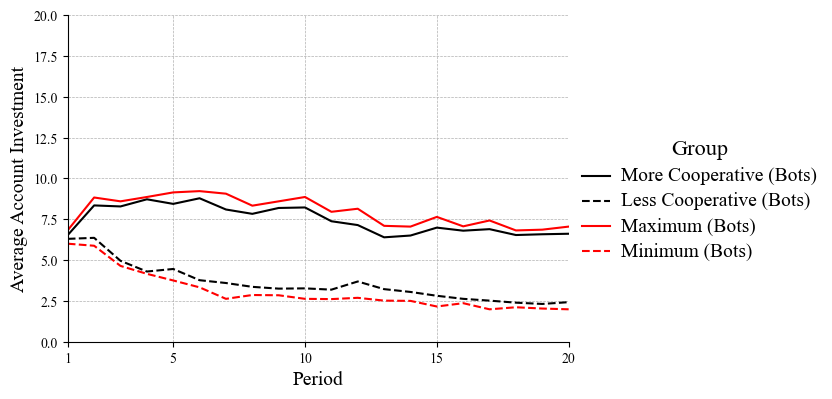

In [110]:
g = sns.FacetGrid(better_worse_max_min_df, margin_titles=True, hue="Group", hue_kws={"color" : ['k','k','r','r'], "ls" : ["-","--","-","--"]}, height=4, aspect=1.5)
g.map(sns.lineplot, "Period", "Average Account Investment")
# g.map(plt.fill_between, "Supergame", "Bootstrap LCI", "Bootstrap HCI", alpha = 0.2)
g.set_titles(col_template = '{col_name}', size=16)
g.set_ylabels(fontsize=14)
g.set_xlabels("Period", fontsize=14)
g.set(xlim=(1, 20), ylim=(0, 20), xticks=[1, 5, 10, 15, 20])
g.add_legend(loc='center right', bbox_to_anchor=(1.05, 0.5))
plt.setp(g._legend.get_title(), fontsize=16)
plt.setp(g._legend.get_texts(), fontsize=14)
for ax in g.axes.flatten():
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(output_folder+'\Ext_Bet_Wor_Max_Min_byPeriod.png', bbox_inches='tight')

In [97]:
# plt.figure(figsize=(10, 6))
# plt.plot(extension_avg_max, label='Max Invest Ext', color='black', linestyle='-')
# plt.plot(extension_avg_min, label='Min Invest Ext', color='black', linestyle='--')
# plt.plot(copy_better_group_averages, label='Better Group Invest', color='red', linestyle = '-')
# plt.plot(copy_worse_group_averages, label='Worse Group Invest', color='red', linestyle='--')
# plt.title('Average Min/Max Invest (Extension) and Average Better/Worse Group Invest (Extension)')
# plt.xlabel('Period')
# plt.ylabel('Average Investment')
# plt.legend()
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.ylim(0,20)
# # Adjust x-axis to show only whole numbers
# plt.xticks([1, 5, 10, 15, 20])

### Plot Min / Max Invest from MAIN against EXTENSION

In [98]:
better_group_averages, worse_group_averages = calculate_averages(mgpgg_extension_all_df)

In [105]:
better_group_averages_df = better_group_averages.to_frame().reset_index()
worse_group_averages_df = worse_group_averages.to_frame().reset_index()
main_avg_max_df = main_avg_max.to_frame().reset_index()
main_avg_max_df.rename(columns={"player.max_invest":0}, inplace=True)
print(main_avg_max_df.head())
main_avg_min_df = main_avg_min.to_frame().reset_index()
main_avg_min_df.rename(columns={"player.min_invest":0}, inplace=True)

better_group_averages_df["Group"] = "More Cooperative (Bots)"
worse_group_averages_df["Group"] = "Less Cooperative (Bots)"
main_avg_max_df["Group"] = "Maximum (Main)"
main_avg_min_df["Group"] = "Minimum (Main)"

   subsession.round_number       0
0                        1  7.3375
1                        2  8.5750
2                        3  8.6125
3                        4  8.9375
4                        5  9.2875


In [106]:
better_worse_main_max_min_df = pd.concat([better_group_averages_df, 
                                     worse_group_averages_df, 
                                     main_avg_max_df, 
                                     main_avg_min_df], ignore_index=True)
# print(better_worse_max_min_df)
better_worse_main_max_min_df.rename(columns={"subsession.round_number":"Period", 0:"Average Account Investment"}, inplace=True)
print(better_worse_main_max_min_df)

    Period  Average Account Investment                    Group
0        1                     6.53125  More Cooperative (Bots)
1        2                     8.34375  More Cooperative (Bots)
2        3                     8.28125  More Cooperative (Bots)
3        4                     8.71875  More Cooperative (Bots)
4        5                     8.43750  More Cooperative (Bots)
..     ...                         ...                      ...
75      16                     2.33750           Minimum (Main)
76      17                     2.32500           Minimum (Main)
77      18                     2.40000           Minimum (Main)
78      19                     2.11250           Minimum (Main)
79      20                     1.98750           Minimum (Main)

[80 rows x 3 columns]


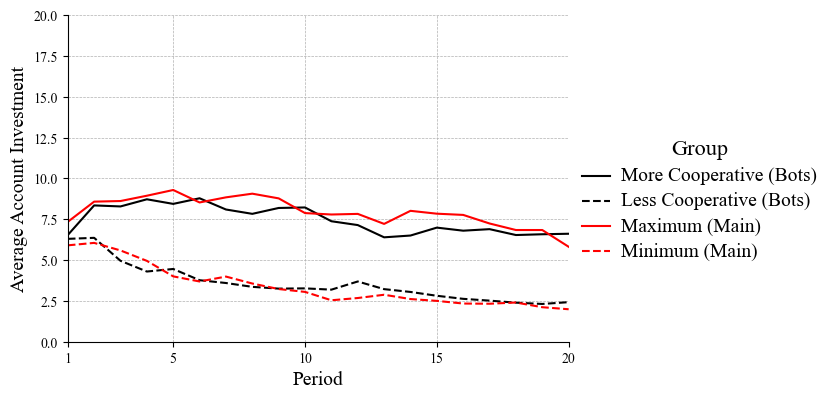

In [107]:
g = sns.FacetGrid(better_worse_main_max_min_df, margin_titles=True, hue="Group", hue_kws={"color" : ['k','k','r','r'], "ls" : ["-","--","-","--"]}, height=4, aspect=1.5)
g.map(sns.lineplot, "Period", "Average Account Investment")
# g.map(plt.fill_between, "Supergame", "Bootstrap LCI", "Bootstrap HCI", alpha = 0.2)
g.set_titles(col_template = '{col_name}', size=16)
g.set_ylabels(fontsize=14)
g.set_xlabels("Period", fontsize=14)
g.set(xlim=(1, 20), ylim=(0, 20), xticks=[1, 5, 10, 15, 20])
g.add_legend(loc='center right', bbox_to_anchor=(1.05, 0.5))
plt.setp(g._legend.get_title(), fontsize=16)
plt.setp(g._legend.get_texts(), fontsize=14)
for ax in g.axes.flatten():
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(output_folder+'\Ext_Bet_Wor_Main_Max_Min_byPeriod.png', bbox_inches='tight')

([<matplotlib.axis.XTick at 0x7f9fd3817d30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

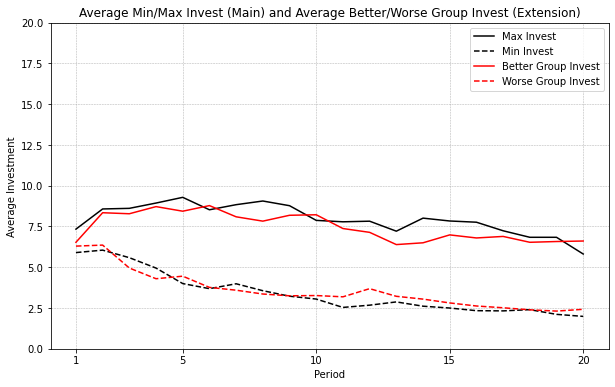

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(main_avg_max, label='Max Invest', color='black', linestyle='-')
plt.plot(main_avg_min, label='Min Invest', color='black', linestyle='--')
plt.plot(better_group_averages, label='Better Group Invest', color='red', linestyle = '-')
plt.plot(worse_group_averages, label='Worse Group Invest', color='red', linestyle='--')
plt.title('Average Min/Max Invest (Main) and Average Better/Worse Group Invest (Extension)')
plt.xlabel('Period')
plt.ylabel('Average Investment')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,20)
# Adjust x-axis to show only whole numbers
plt.xticks([1, 5, 10, 15, 20])

### Normal Groupings (Main) | Better Worse (Ext)

In [24]:
blue_inv_avg = mgpgg_shared_df[mgpgg_shared_df['bots'] == False].groupby('subsession.round_number')['player.blue_group_investment'].mean()
green_inv_avg = mgpgg_shared_df[mgpgg_shared_df['bots'] == False].groupby('subsession.round_number')['player.green_group_investment'].mean()

([<matplotlib.axis.XTick at 0x7f9ff13094c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

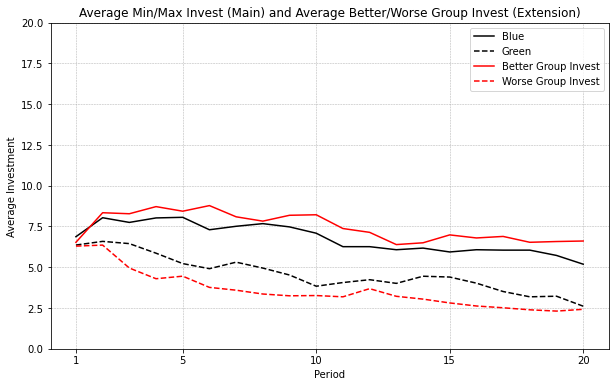

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(blue_inv_avg, label='Blue', color='black', linestyle='-')
plt.plot(green_inv_avg, label='Green', color='black', linestyle='--')
plt.plot(better_group_averages, label='Better Group Invest', color='red', linestyle = '-')
plt.plot(worse_group_averages, label='Worse Group Invest', color='red', linestyle='--')
plt.title('Average Min/Max Invest (Main) and Average Better/Worse Group Invest (Extension)')
plt.xlabel('Period')
plt.ylabel('Average Investment')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,20)
# Adjust x-axis to show only whole numbers
plt.xticks([1, 5, 10, 15, 20])

### Compare min max both

([<matplotlib.axis.XTick at 0x7f9ff1515af0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

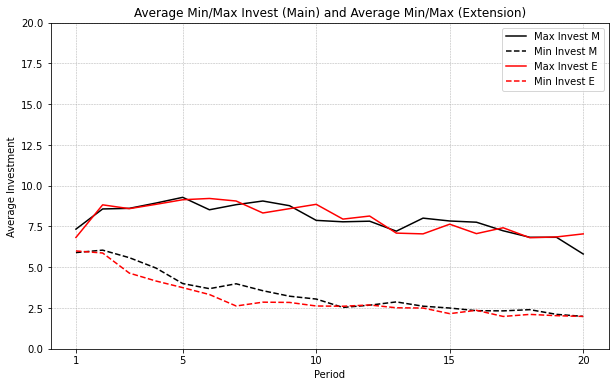

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(main_avg_max, label='Max Invest M', color='black', linestyle='-')
plt.plot(main_avg_min, label='Min Invest M', color='black', linestyle='--')
plt.plot(extension_avg_max, label='Max Invest E', color='red', linestyle='-')
plt.plot(extension_avg_min, label='Min Invest E', color='red', linestyle='--')
plt.title('Average Min/Max Invest (Main) and Average Min/Max (Extension)')
plt.xlabel('Period')
plt.ylabel('Average Investment')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,20)
# Adjust x-axis to show only whole numbers
plt.xticks([1, 5, 10, 15, 20])

### Combine Data Sets for Regression Analysis (in Stata)

In [27]:
mgpgg_shared_df.rename(columns={
    'player.comprehension_question_one_shared': 'player.comprehension_question_one',
    'player.comprehension_question_two_shared': 'player.comprehension_question_two',
    'player.comprehension_question_three_a_shared': 'player.comprehension_question_three_a',
    'player.comprehension_question_three_b_shared': 'player.comprehension_question_three_b',
    'player.comprehension_question_four_a_shared': 'player.comprehension_question_four_a',
    'player.comprehension_question_four_b_shared': 'player.comprehension_question_four_b',
    'player.comprehension_question_four_c_shared': 'player.comprehension_question_four_c',
    'player.comprehension_question_four_d_shared': 'player.comprehension_question_four_d',
    'player.time_to_answer_treatment_instrucs': 'player.time_to_answer',
    'player.start_time_treatment_instrucs': 'player.start_time',
    'player.time_spent_instrucs_treatment': 'player.time_spent_instrucs',
    'player.time_spent_q_one_treatment': 'player.time_spent_q_one',
    'player.time_spent_q_two_treatment': 'player.time_spent_q_two',
    'player.time_spent_q_three_treatment': 'player.time_spent_q_three',
    'player.time_spent_q_four_treatment': 'player.time_spent_q_four',
    'player.num_errors_q_one_shared': 'player.num_errors_q_one',
    'player.num_errors_q_two_shared': 'player.num_errors_q_two',
    'player.num_errors_q_three_a_shared': 'player.num_errors_q_three_a',
    'player.num_errors_q_three_b_shared': 'player.num_errors_q_three_b',
    'player.num_errors_q_four_a_shared': 'player.num_errors_q_four_a',
    'player.num_errors_q_four_b_shared': 'player.num_errors_q_four_b',
    'player.num_errors_q_four_c_shared': 'player.num_errors_q_four_c',
    'player.num_errors_q_four_d_shared': 'player.num_errors_q_four_d',
    'player.max_invest': 'player.better_group_investment',
    'player.min_invest': 'player.worse_group_investment',
    'group_max_invest': 'player.better_group_total_investment',
    'group_min_invest': 'player.worse_group_total_investment',
    'max_invest_group': 'better_group',
    'min_invest_group': 'worse_group'
    
}, inplace=True)

### Encode 'min' and 'max' column for extension

In [136]:
mgpgg_shared_df

,pgg_treatment_applied,participant.id_in_session,participant.code,participant.payoff,player.id_in_group,player.payoff,player.investment,player.personal_account,player.indiv_share,player.tot_invest,...,player.suggestions,player.start_time_survey,player.time_spent_survey_one,player.time_spent_survey_two,player.time_spent_survey_three,player.time_spent_survey_four,player.compare_groups,player.reasoning,player.signaling,bots
0,shared,1,znlu9jpg,841.0,1,27.0,NaN,6.0,NaN,NaN,...,"I think the instructions were lengthy, but nec...",1.693940e+09,356.855662,10.035168,122.389361,NaN,NaN,"The probability that others would also invest,...",I was hoping to get a higher overall investmen...,False
1,shared,1,znlu9jpg,841.0,1,25.0,NaN,2.0,NaN,NaN,...,"I think the instructions were lengthy, but nec...",1.693940e+09,356.855662,10.035168,122.389361,NaN,NaN,"The probability that others would also invest,...",I was hoping to get a higher overall investmen...,False
2,shared,1,znlu9jpg,841.0,1,26.0,NaN,5.0,NaN,NaN,...,"I think the instructions were lengthy, but nec...",1.693940e+09,356.855662,10.035168,122.389361,NaN,NaN,"The probability that others would also invest,...",I was hoping to get a higher overall investmen...,False
3,shared,1,znlu9jpg,841.0,1,27.0,NaN,8.0,NaN,NaN,...,"I think the instructions were lengthy, but nec...",1.693940e+09,356.855662,10.035168,122.389361,NaN,NaN,"The probability that others would also invest,...",I was hoping to get a higher overall investmen...,False
4,shared,1,znlu9jpg,841.0,1,28.0,NaN,12.0,NaN,NaN,...,"I think the instructions were lengthy, but nec...",1.693940e+09,356.855662,10.035168,122.389361,NaN,NaN,"The probability that others would also invest,...",I was hoping to get a higher overall investmen...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,shared,16,w9zef9ad,939.0,16,31.0,NaN,5.0,NaN,NaN,...,NaN,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN,False
1596,shared,16,w9zef9ad,939.0,16,30.0,NaN,4.0,NaN,NaN,...,NaN,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN,False
1597,shared,16,w9zef9ad,939.0,16,33.0,NaN,6.0,NaN,NaN,...,NaN,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN,False
1598,shared,16,w9zef9ad,939.0,16,29.0,NaN,4.0,NaN,NaN,...,NaN,1.695935e+09,253.511639,22.543194,13.628525,8.111268,I invested in groups with equal contributions ...,NaN,NaN,False


In [137]:
mgpgg_extension_all_df.columns

Index(['participant.id_in_session', 'participant.code', 'participant.payoff',
       'player.id_in_group', 'player.payoff',
       'player.blue_group_human_partner', 'player.green_group_human_partner',
       'player.blue_group_total_investment',
       'player.blue_group_individual_share',
       'player.green_group_total_investment',
       'player.green_group_individual_share', 'player.blue_group_profit',
       'player.green_group_profit', 'player.personal_account',
       'player.blue_group_investment', 'player.green_group_investment',
       'player.blue_bot_one_investment', 'player.blue_bot_two_investment',
       'player.green_bot_one_investment', 'player.green_bot_two_investment',
       'player.start_time', 'player.time_spent_invest',
       'player.time_spent_results', 'player.time_spent_cumulative_results',
       'player.num_errors_invest', 'group.id_in_subsession',
       'subsession.round_number', 'session.code', 'session.is_demo',
       'blue_green', 'player.comprehens

In [138]:
mgpgg_extension_all_df = encode_group_investments(mgpgg_extension_all_df)
mgpgg_extension_all_df = encode_additional_group_investments(mgpgg_extension_all_df)
mgpgg_extension_all_df

,participant.id_in_session,participant.code,participant.payoff,player.id_in_group,player.payoff,player.blue_group_human_partner,player.green_group_human_partner,player.blue_group_total_investment,player.blue_group_individual_share,player.green_group_total_investment,...,player.time_spent_survey_four,bots,player.better_group_investment,player.worse_group_investment,better_group,worse_group,player.better_group_total_investment,player.worse_group_total_investment,player.better_group_bot_investment,player.worse_group_bot_investment
0,1,reaj0cas,610.0,1,25.0,2.0,3.0,17.0,9.0,31.0,...,25.080155,True,10.0,10.0,green,blue,31.0,17.0,18.0,2.0
1,1,reaj0cas,610.0,1,30.0,2.0,3.0,16.0,8.0,32.0,...,25.080155,True,7.0,7.0,green,blue,32.0,16.0,17.0,2.0
2,1,reaj0cas,610.0,1,31.0,2.0,3.0,9.0,5.0,32.0,...,25.080155,True,5.0,5.0,green,blue,32.0,9.0,18.0,0.0
3,1,reaj0cas,610.0,1,29.0,2.0,3.0,9.0,5.0,31.0,...,25.080155,True,6.0,6.0,green,blue,31.0,9.0,18.0,0.0
4,1,reaj0cas,610.0,1,27.0,2.0,3.0,26.0,13.0,27.0,...,25.080155,True,0.0,20.0,green,blue,27.0,26.0,18.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,8,w2s587fz,616.0,8,35.0,7.0,6.0,27.0,14.0,15.0,...,27.124380,True,2.0,5.0,blue,green,27.0,15.0,16.0,0.0
1276,8,w2s587fz,616.0,8,31.0,7.0,6.0,28.0,14.0,5.0,...,27.124380,True,1.0,5.0,blue,green,28.0,5.0,17.0,0.0
1277,8,w2s587fz,616.0,8,31.0,7.0,6.0,26.0,13.0,7.0,...,27.124380,True,1.0,5.0,blue,green,26.0,7.0,17.0,1.0
1278,8,w2s587fz,616.0,8,31.0,7.0,6.0,26.0,13.0,6.0,...,27.124380,True,0.0,5.0,blue,green,26.0,6.0,18.0,0.0


## Combine Extension & Main df for Stata Regressions


In [139]:
# Combine the shared EXTENSION data and shared MAIN data

mgpgg_extension_all_df.reset_index(drop=True, inplace=True)
mgpgg_shared_df.reset_index(drop=True, inplace=True)

# # Save to CSV and read back
# mgpgg_extension_all_df.to_csv('mgpgg_extension_all_df.csv', index=False)
# mgpgg_shared_df.to_csv('mgpgg_shared_df.csv', index=False)

# # Read back
# mgpgg_extension_all_df = pd.read_csv('mgpgg_extension_all_df.csv')
# mgpgg_shared_df = pd.read_csv('mgpgg_shared_df.csv')

# Concatenate again
mgpgg_shared_extension_and_main_df = pd.concat([mgpgg_extension_all_df, mgpgg_shared_df], ignore_index=True)


In [140]:
mgpgg_shared_extension_and_main_df.head()

,participant.id_in_session,participant.code,participant.payoff,player.id_in_group,player.payoff,player.blue_group_human_partner,player.green_group_human_partner,player.blue_group_total_investment,player.blue_group_individual_share,player.green_group_total_investment,...,player.time_spent_results_lottery,player.num_safe_choice,player.risk_estimate_lower_bound,player.risk_estimate_upper_bound,player.risk_preference_classification,player.password_to_start_survey,player.reason_own,player.start_time_survey,player.reasoning,player.signaling
0,1,reaj0cas,610.0,1,25.0,2.0,3.0,17.0,9.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,reaj0cas,610.0,1,30.0,2.0,3.0,16.0,8.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,reaj0cas,610.0,1,31.0,2.0,3.0,9.0,5.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,reaj0cas,610.0,1,29.0,2.0,3.0,9.0,5.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,reaj0cas,610.0,1,27.0,2.0,3.0,26.0,13.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Prepare Combined Data for Stata
- get rid of '.' in column names
- shorten column names
- Drop 'dead' columns
- save to csv

In [141]:
cols = mgpgg_shared_extension_and_main_df.columns.to_list()
cols

['participant.id_in_session',
 'participant.code',
 'participant.payoff',
 'player.id_in_group',
 'player.payoff',
 'player.blue_group_human_partner',
 'player.green_group_human_partner',
 'player.blue_group_total_investment',
 'player.blue_group_individual_share',
 'player.green_group_total_investment',
 'player.green_group_individual_share',
 'player.blue_group_profit',
 'player.green_group_profit',
 'player.personal_account',
 'player.blue_group_investment',
 'player.green_group_investment',
 'player.blue_bot_one_investment',
 'player.blue_bot_two_investment',
 'player.green_bot_one_investment',
 'player.green_bot_two_investment',
 'player.start_time',
 'player.time_spent_invest',
 'player.time_spent_results',
 'player.time_spent_cumulative_results',
 'player.num_errors_invest',
 'group.id_in_subsession',
 'subsession.round_number',
 'session.code',
 'session.is_demo',
 'blue_green',
 'player.comprehension_question_one',
 'player.comprehension_question_two',
 'player.comprehension_q

In [142]:
mgpgg_shared_extension_and_main_df.drop(columns=['player.start_time', 'session.is_demo','player.password_to_start','player.start_time.1','Shared','Split','Single', 'player.blue_group_profit', 'player.green_group_profit'], inplace=True)

KeyError: "['player.start_time.1', 'Shared', 'Split', 'Single'] not found in axis"

In [143]:
rename_dict = {
    'participant.id_in_session': 'participant_id',
    'participant.code': 'participant_code',
    'participant.payoff': 'payoff',
    'player.id_in_group': 'id_in_group',
    'player.payoff': 'period_payoff',
    'player.blue_group_human_partner': 'blue_human_part_id',
    'player.green_group_human_partner': 'green_human_part_id',
    'player.blue_group_total_investment': 'blue_tot_invest',
    'player.blue_group_individual_share': 'blue_indiv_share',
    'player.green_group_total_investment': 'green_tot_invest',
    'player.green_group_individual_share': 'green_indiv_share',
    'player.personal_account': 'personal_account',
    'player.blue_group_investment': 'blue_invest',
    'player.green_group_investment': 'green_invest',
    'player.blue_bot_one_investment': 'blue_bot_one_invest',
    'player.blue_bot_two_investment': 'blue_bot_two_invest',
    'player.green_bot_one_investment': 'green_bot_one_invest',
    'player.green_bot_two_investment': 'green_bot_two_invest',
    'player.time_spent_invest': 'time_on_invest',
    'player.time_spent_results': 'time_on_results',
    'player.time_spent_cumulative_results': 'time_on_cum_results',
    'player.num_errors_invest': 'num_invest_errors',
    'group.id_in_subsession': 'group_id',
    'subsession.round_number': 'period',
    'session.code': 'session_code',
    'blue_green': 'screen_bl_gr_bool',
    'player.comprehension_question_one': 'cq_one',
    'player.comprehension_question_two': 'cq_two',
    'player.comprehension_question_two_point_five': 'cq_bot',
    'player.comprehension_question_three_a': 'cq_three_a',
    'player.comprehension_question_three_b': 'cq_three_b',
    'player.comprehension_question_four_a': 'cq_four_a',
    'player.comprehension_question_four_b': 'cq_four_b',
    'player.comprehension_question_four_c': 'cq_four_c',
    'player.comprehension_question_four_d': 'cq_four_d',
    'player.time_spent_instrucs': 'time_on_instrucs',
    'player.time_spent_q_one': 'time_on_q_one',
    'player.time_spent_q_two': 'time_on_q_two',
    'player.time_spent_q_two_point_five': 'time_on_q_bot',
    'player.time_spent_q_three': 'time_on_q_three',
    'player.time_spent_q_four': 'time_on_q_four',
    'player.num_errors_q_one': 'num_q_one_errors',
    'player.num_errors_q_two': 'num_q_two_errors',
    'player.num_errors_q_two_point_five': 'num_q_bot_errors',
    'player.num_errors_q_three_a': 'num_q_three_a_errors',
    'player.num_errors_q_three_b': 'num_q_three_b_errors',
    'player.num_errors_q_four_a': 'num_q_four_a_errors',
    'player.num_errors_q_four_b': 'num_q_four_b_errors',
    'player.num_errors_q_four_c': 'num_q_four_c_errors',
    'player.num_errors_q_four_d': 'num_q_four_d_errors',
    'player.gender': 'gender',
    'player.age': 'age',
    'player.grade': 'grade',
    'player.major': 'major',
    'player.risk': 'risk',
    'player.compare_groups': 'compare_groups',
    'player.personal_versus_group': 'personal_vs_group',
    'player.change': 'change',
    'player.bot_number_blue': 'bot_num_blue',
    'player.bot_level_blue': 'bot_level_blue',
    'player.bots_pattern_blue': 'bot_pattern_blue',
    'player.bots_own_blue': 'bot_own_blue',
    'player.bots_understand_blue': 'bot_understand_blue',
    'player.bot_number_green': 'bot_num_green',
    'player.bot_level_green': 'bot_level_green',
    'player.bots_pattern_green': 'bot_pattern_green',
    'player.bots_own_green': 'bot_own_green',
    'player.bots_understand_green': 'bot_understand_green',
    'player.reason_group': 'reason_own',
    'player.reason_conditional': 'reason_condition',
    'player.reason_experiment': 'reason_experiment',
    'player.reason_adjust': 'reason_adjust',
    'player.reason_future_rounds': 'reason_future',
    'player.decision_style_facts': 'style_facts',
    'player.decision_style_feelings': 'style_feels',
    'player.decision_style_family': 'style_fam',
    'player.decision_style_friend': 'style_friend',
    'player.clarity': 'clarity',
    'player.suggestions': 'suggestions',
    'player.time_spent_survey_one': 'time_on_survey_one',
    'player.time_spent_survey_bots': 'time_on_survey_bots',
    'player.time_spent_survey_two': 'time_on_survey_two',
    'player.time_spent_survey_three': 'time_on_survey_three',
    'player.time_spent_survey_four': 'time_on_survey_four',
    'bots': 'bot_bool',
    'player.better_group_investment': 'invest_better_group',
    'player.worse_group_investment': 'invest_worse_group',
    'better_group': 'better_group_color',
    'worse_group': 'worse_group_color',
    'player.better_group_total_investment': 'tot_invest_better_group',
    'player.worse_group_total_investment': 'tot_invest_worse_group',
    'player.better_group_bot_investment': 'bot_invest_better_group',
    'player.worse_group_bot_investment': 'bot_invest_worse_group',
    'player.blue_group_partner_one_id': 'blue_partner_one_id',
    'player.blue_group_partner_two_id': 'blue_partner_two_id',
    'player.blue_group_partner_three_id': 'blue_partner_three_id',
    'player.green_group_partner_one_id': 'green_partner_one_id',
    'player.green_group_partner_two_id': 'green_partner_two_id',
    'player.green_group_partner_three_id': 'green_partner_three_id',
    'player.time_to_answer': 'cq_time_to_answer'  
}

# Rename the columns using the dictionary
mgpgg_shared_extension_and_main_df.rename(columns=rename_dict, inplace=True)

In [144]:
mgpgg_shared_extension_and_main_df.columns

Index(['participant_id', 'participant_code', 'payoff', 'id_in_group',
       'period_payoff', 'blue_human_part_id', 'green_human_part_id',
       'blue_tot_invest', 'blue_indiv_share', 'green_tot_invest',
       ...
       'player.time_spent_results_lottery', 'player.num_safe_choice',
       'player.risk_estimate_lower_bound', 'player.risk_estimate_upper_bound',
       'player.risk_preference_classification',
       'player.password_to_start_survey', 'player.reason_own',
       'player.start_time_survey', 'player.reasoning', 'player.signaling'],
      dtype='object', length=268)

In [145]:
mgpgg_shared_extension_and_main_df.head()

,participant_id,participant_code,payoff,id_in_group,period_payoff,blue_human_part_id,green_human_part_id,blue_tot_invest,blue_indiv_share,green_tot_invest,...,player.time_spent_results_lottery,player.num_safe_choice,player.risk_estimate_lower_bound,player.risk_estimate_upper_bound,player.risk_preference_classification,player.password_to_start_survey,player.reason_own,player.start_time_survey,player.reasoning,player.signaling
0,1,reaj0cas,610.0,1,25.0,2.0,3.0,17.0,9.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,reaj0cas,610.0,1,30.0,2.0,3.0,16.0,8.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,reaj0cas,610.0,1,31.0,2.0,3.0,9.0,5.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,reaj0cas,610.0,1,29.0,2.0,3.0,9.0,5.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,reaj0cas,610.0,1,27.0,2.0,3.0,26.0,13.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
mgpgg_shared_extension_and_main_df.to_csv(input_folder_main+'\extension_stata_df.csv',index=False)

## Points in the system in a Period

    period  bot_bool  personal_account
0        1     False          6.762500
1        1      True          7.171875
2        2     False          5.375000
3        2      True          5.296875
4        3     False          5.800000
5        3      True          6.765625
6        4     False          6.112500
7        4      True          6.984375
8        5     False          6.712500
9        5      True          7.109375
10       6     False          7.787500
11       6      True          7.453125
12       7     False          7.175000
13       7      True          8.312500
14       8     False          7.375000
15       8      True          8.812500
16       9     False          8.000000
17       9      True          8.562500
18      10     False          9.075000
19      10      True          8.515625
20      11     False          9.675000
21      11      True          9.437500
22      12     False          9.500000
23      12      True          9.171875
24      13     False     

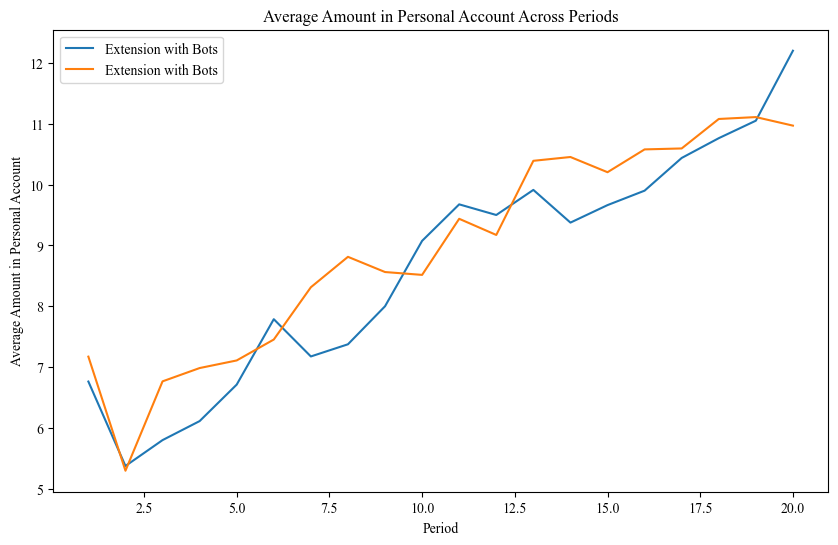

In [148]:
averages = mgpgg_shared_extension_and_main_df.groupby(['period', 'bot_bool'])['personal_account'].mean().reset_index()
print(averages)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

for key, grp in averages.groupby(['bot_bool']):
    label = 'Main Experiment (no bots)' if not key else 'Extension with Bots'
    ax.plot(grp['period'], grp['personal_account'], label=label)

ax.set_xlabel('Period')
ax.set_ylabel('Average Amount in Personal Account')
ax.legend()
plt.title('Average Amount in Personal Account Across Periods')
plt.show()


## Look at Profits
- Cooperator Bots
- Free-rider Bots
- Human Subjects

In [151]:
# Filter the original dataframe to include only rows where 'bot_bool' is True
bot_df = mgpgg_shared_extension_and_main_df[mgpgg_shared_extension_and_main_df['bot_bool'] == True]

# Verify the 'bot_bool' column only contains True values
bot_df['bot_bool'].unique()

endowment = 20

# We will define a function to calculate the profits for each bot in a given period within a session
# Define the full corrected function to calculate the profits for each bot in a given period within a session
def calculate_period_profits(group, period, bot_mapping):
    period_profits = {'period': period}
    for bot_id, bot_info in bot_mapping.items():
        # Retrieve the correct investment and share values for the blue and green groups
        blue_bot_invest = group.loc[
            group['id_in_group'] == bot_info['blue_id'], bot_info['blue_invest_col']
        ].iloc[0] if bot_info['blue_invest_col'] in group.columns else 0
        green_bot_invest = group.loc[
            group['id_in_group'] == bot_info['green_id'], bot_info['green_invest_col']
        ].iloc[0] if bot_info['green_invest_col'] in group.columns else 0
        blue_share = group.loc[
            group['id_in_group'] == bot_info['blue_id'], 'blue_indiv_share'
        ].iloc[0] if 'blue_indiv_share' in group.columns else 0
        green_share = group.loc[
            group['id_in_group'] == bot_info['green_id'], 'green_indiv_share'
        ].iloc[0] if 'green_indiv_share' in group.columns else 0

        # Calculate profit for this bot using the formula provided
        bot_profit = (endowment - (blue_bot_invest + green_bot_invest) + (blue_share + green_share))
        
        # Store the profit in the dictionary with the key as the bot's identifier
        period_profits[bot_info['profit_col']] = bot_profit

    return period_profits

# Now let's use this function to construct the whole DataFrame with the corrected profits for each bot

# Correcting the calculate_period_profits function and reconstructing the DataFrame

# Define the mapping for each bot to its corresponding investments and individual shares
bot_mapping = {
    1: {'blue_id': 1, 'green_id': 5, 'blue_invest_col': 'blue_bot_one_invest', 'green_invest_col': 'green_bot_one_invest', 'profit_col': 'B1_profit'},
    2: {'blue_id': 1, 'green_id': 6, 'blue_invest_col': 'blue_bot_two_invest', 'green_invest_col': 'green_bot_two_invest', 'profit_col': 'B2_profit'},
    3: {'blue_id': 3, 'green_id': 5, 'blue_invest_col': 'blue_bot_three_invest', 'green_invest_col': 'green_bot_three_invest', 'profit_col': 'B3_profit'},
    4: {'blue_id': 3, 'green_id': 6, 'blue_invest_col': 'blue_bot_four_invest', 'green_invest_col': 'green_bot_four_invest', 'profit_col': 'B4_profit'},
    5: {'blue_id': 2, 'green_id': 1, 'blue_invest_col': 'blue_bot_five_invest', 'green_invest_col': 'green_bot_five_invest', 'profit_col': 'B5_profit'},
    6: {'blue_id': 2, 'green_id': 2, 'blue_invest_col': 'blue_bot_six_invest', 'green_invest_col': 'green_bot_six_invest', 'profit_col': 'B6_profit'},
    7: {'blue_id': 4, 'green_id': 1, 'blue_invest_col': 'blue_bot_seven_invest', 'green_invest_col': 'green_bot_seven_invest', 'profit_col': 'B7_profit'},
    8: {'blue_id': 4, 'green_id': 2, 'blue_invest_col': 'blue_bot_eight_invest', 'green_invest_col': 'green_bot_eight_invest', 'profit_col': 'B8_profit'},
}

# Calculate the profits for all bots for each period in each session
all_bot_profits_corrected = pd.DataFrame()
# all_bot_profits_corrected = []

# Iterate over each session and period to calculate profits
for (session_code, period), period_group in bot_df.groupby(['session_code', 'period']):
    # Calculate the profits using the corrected function
    period_profits = calculate_period_profits(period_group, period, bot_mapping)
    period_profits['session_code'] = session_code  # Add session code to the profits

    # print(period_profits)
    period_profits_df = pd.DataFrame(period_profits, index=[0])

    # all_bot_profits_corrected = all_bot_profits_corrected.append(period_profits)

    all_bot_profits_corrected = pd.concat([all_bot_profits_corrected, period_profits_df], ignore_index=True)

print(all_bot_profits_corrected)

# Check the corrected profit for B1 in period 1 for the first session
all_bot_profits_corrected[all_bot_profits_corrected['session_code'] == 'p40h0u4h'].head()


     period  B1_profit  B2_profit  B3_profit  B4_profit  B5_profit  B6_profit  \
0         1       27.0       31.0       31.0       33.0       42.0       39.0   
1         2       31.0       34.0       36.0       39.0       39.0       43.0   
2         3       30.0       29.0       33.0       37.0       44.0       44.0   
3         4       27.0       28.0       28.0       30.0       41.0       44.0   
4         5       26.0       37.0       26.0       37.0       39.0       45.0   
..      ...        ...        ...        ...        ...        ...        ...   
155      16       27.0       22.0       25.0       20.0       35.0       49.0   
156      17       36.0       29.0       27.0       22.0       43.0       49.0   
157      18       23.0       24.0       25.0       24.0       38.0       55.0   
158      19       27.0       22.0       27.0       24.0       35.0       49.0   
159      20       23.0       22.0       27.0       24.0       35.0       41.0   

     B7_profit  B8_profit s

,period,B1_profit,B2_profit,B3_profit,B4_profit,B5_profit,B6_profit,B7_profit,B8_profit,session_code
120,1,34.0,38.0,29.0,35.0,45.0,44.0,40.0,39.0,p40h0u4h
121,2,34.0,34.0,32.0,34.0,44.0,45.0,42.0,43.0,p40h0u4h
122,3,28.0,30.0,33.0,35.0,41.0,42.0,46.0,47.0,p40h0u4h
123,4,31.0,30.0,34.0,33.0,41.0,40.0,44.0,43.0,p40h0u4h
124,5,35.0,37.0,31.0,33.0,47.0,45.0,41.0,39.0,p40h0u4h


           average_payoff
B1_profit        27.27500
B2_profit        27.16875
B3_profit        29.10000
B4_profit        29.00625
B5_profit        39.31250
B6_profit        40.98125
B7_profit        40.16250
B8_profit        41.83125


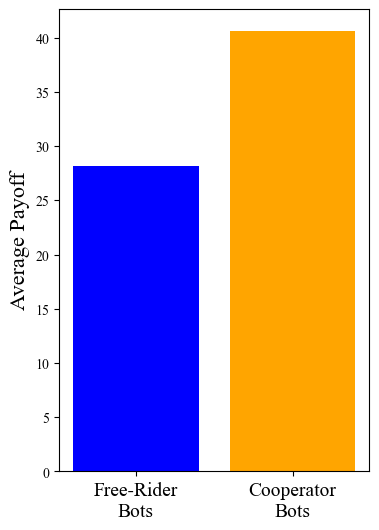

In [180]:
# First, we'll calculate the average payoff for each bot across all sessions and periods
bot_avg_payoffs = all_bot_profits_corrected[["B1_profit", "B2_profit", "B3_profit",
                                             "B4_profit", "B5_profit", "B6_profit",
                                             "B7_profit", "B8_profit"]].mean().to_frame(name='average_payoff')
print(bot_avg_payoffs)

# Now, we'll create separate DataFrames for bots using function F and function C
bots_F = bot_avg_payoffs.loc[['B1_profit', 'B2_profit', 'B3_profit', 'B4_profit']]
bots_C = bot_avg_payoffs.loc[['B5_profit', 'B6_profit', 'B7_profit', 'B8_profit']]

# Calculate the average payoffs for both groups
avg_payoff_F = bots_F['average_payoff'].mean()
avg_payoff_C = bots_C['average_payoff'].mean()

# Plot the average payoffs
plt.figure(figsize=(4, 6))
plt.bar('Free-Rider\nBots', avg_payoff_F, color='blue', label='Function F')
plt.bar('Cooperator\nBots', avg_payoff_C, color='orange', label='Function C')
# plt.title('Average Payoff for Bots Using Functions F and C')
plt.ylabel('Average Payoff', fontsize=16)
plt.xticks(fontsize = 14)
# plt.legend()
plt.show()

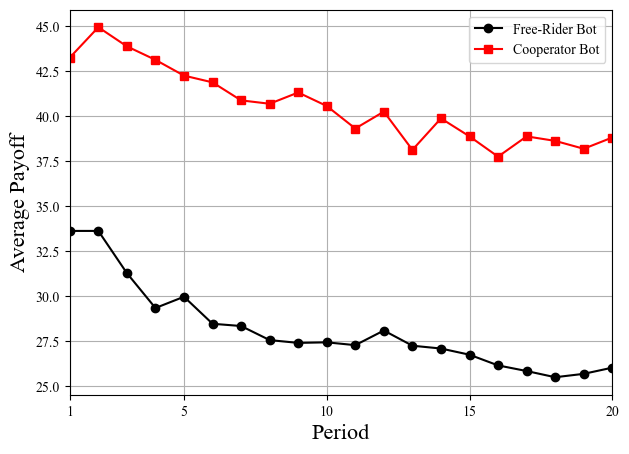

In [174]:
# Calculate the average payoff per period for F and C type bots across all sessions
# First, we'll group the data by period
grouped_by_period = all_bot_profits_corrected.groupby('period')

# Initialize two lists to store the average payoffs for each period for F and C type bots
average_payoffs_F = []
average_payoffs_C = []

# Calculate the average for each period
for period, group in grouped_by_period:
    average_payoff_F = group[['B1_profit', 'B2_profit', 'B3_profit', 'B4_profit']].mean(axis=1).mean()
    average_payoffs_F.append(average_payoff_F)

    average_payoff_C = group[['B5_profit', 'B6_profit', 'B7_profit', 'B8_profit']].mean(axis=1).mean()
    average_payoffs_C.append(average_payoff_C)

# Now let's plot these averages over the periods
periods = grouped_by_period.groups.keys()

plt.figure(figsize=(7,5))
plt.plot(periods, average_payoffs_F, c = "k", label='Free-Rider Bot', marker='o')
plt.plot(periods, average_payoffs_C, c = "r", label='Cooperator Bot', marker='s')
plt.xlim(1,20)
plt.xticks([1, 5, 10, 15, 20])
# plt.title('Average Payoff per Period for Bots Using Functions F and C')
plt.xlabel('Period', fontsize = 16)
plt.ylabel('Average Payoff', fontsize = 16)
plt.legend()
plt.grid(True)
plt.savefig(output_folder+'\Bot_Payoff_byPeriod.png', bbox_inches='tight')
plt.show()

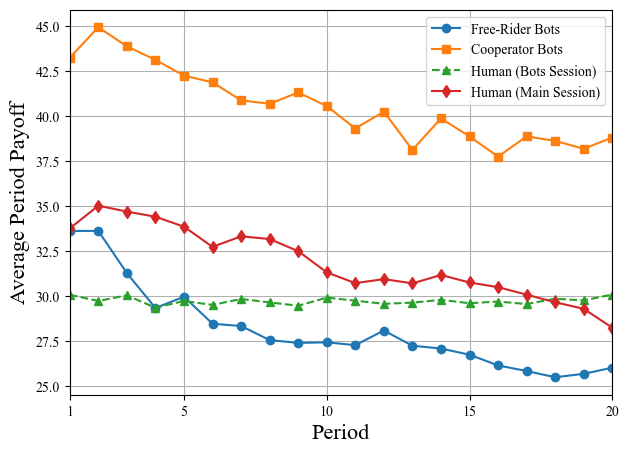

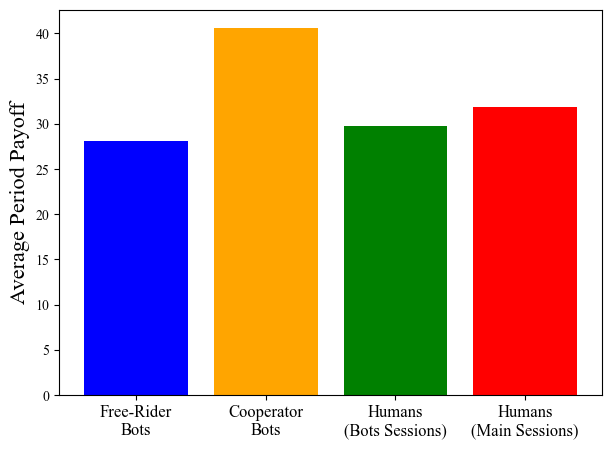

In [181]:
human_df = mgpgg_shared_extension_and_main_df[mgpgg_shared_extension_and_main_df['bot_bool'] == True]

main_df = mgpgg_shared_extension_and_main_df[mgpgg_shared_extension_and_main_df['bot_bool'] == False]
# For the accurate human player average payoff per period, we'll use the 'period_payoff' column
# Calculate the average 'period_payoff' for human players per period across all sessions
human_period_payoffs = human_df.groupby('period')['period_payoff'].mean()

main_period_payoffs = main_df.groupby('period')['period_payoff'].mean()

# Update the line graph to include the average human player 'period_payoff' per period
plt.figure(figsize=(7,5))
plt.plot(periods, average_payoffs_F, label='Free-Rider Bots', marker='o')
plt.plot(periods, average_payoffs_C, label='Cooperator Bots', marker='s')
plt.plot(human_period_payoffs.index, human_period_payoffs.values, label='Human (Bots Session)', marker='^', linestyle='--')
plt.plot(main_period_payoffs.index, main_period_payoffs.values, label='Human (Main Session)', marker='d', linestyle='-' )
# plt.title('Average Period Payoff for Bots Using Functions F and C, and Players')
plt.xlim(1,20)
plt.xticks([1, 5, 10, 15, 20])
plt.xlabel('Period', fontsize = 16)
plt.ylabel('Average Period Payoff', fontsize = 16)
plt.legend()
plt.grid(True)
plt.savefig(output_folder+'\Avg_Payoffs_byPeriods.png', bbox_inches='tight')
plt.show()

# For the bar chart, we'll include the average human player 'period_payoff' across all periods
# Calculate the overall average 'period_payoff' for human players
human_overall_avg_period_payoff = human_period_payoffs.mean()

main_overall_avg_period_payoff = main_period_payoffs.mean()

# Plotting the updated bar chart
plt.figure(figsize=(7, 5))
plt.bar('Free-Rider\nBots', avg_payoff_F, color='blue', label='Free-Rider Bots')
plt.bar('Cooperator\nBots', avg_payoff_C, color='orange', label='Cooperator Bots')
plt.bar('Humans\n(Bots Sessions)', human_overall_avg_period_payoff, color='green', label='Players From Extension')
plt.bar('Humans\n(Main Sessions)', main_overall_avg_period_payoff, color='red', label='Players from Main')
# plt.title('Overall Average Period Payoff for Free-Rider Bots, Cooperator Bots, Extension Players and Main Players')
plt.ylabel('Average Period Payoff', fontsize = 16)
plt.xticks(fontsize = 12)
# plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.savefig(output_folder+'\Avg_Payoffs_Bar.png', bbox_inches='tight')
plt.show()

## Survey Responses (Extension)

In [44]:
#TODO